In [ ]:
!pip install -q transformers

In [ ]:
!pip install -q youtube_transcript_api

In [ ]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [ ]:
youtube_video = "https://www.youtube.com/watch?v=2iOlM9XdOYo"

In [ ]:
video_id = youtube_video.split("=")[1]

In [ ]:
video_id

'2iOlM9XdOYo'

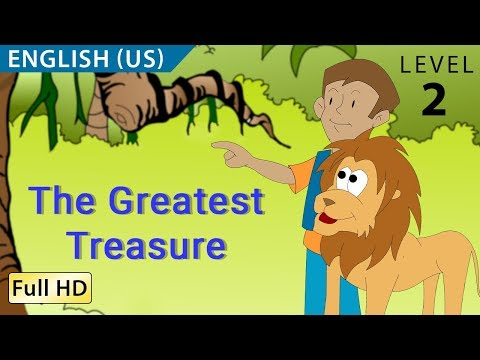

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [ ]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [ ]:
transcript[0:5]

[{'text': 'the greatest treasure', 'start': 14.32, 'duration': 6.16},
 {'text': 'by ahmed garg', 'start': 17.52, 'duration': 2.96},
 {'text': 'one day', 'start': 23.039, 'duration': 5.201},
 {'text': 'peter found a treasure map', 'start': 24.32, 'duration': 3.92},
 {'text': "hooray i'm going to find this treasure",
  'start': 28.84,
  'duration': 7.08}]

In [ ]:
result = ""
for i in transcript:
  result += ' '+i['text']

print(len(result))

2322


In [ ]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [ ]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0,num_iters+1):
  start=0
  start = i*1000
  end = (i+1) * 1000
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  summarized_text.append(out)

print(summarized_text)

Your max_length is set to 142, but your input_length is only 62. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=31)


[' The greatest treasure by ahmed garg one day peter found a treasure map and set off to go on a treasure hunt . The two eventually reached a mountain they met eagle and joined peter and lion in the hunt for a treasure . eagle with his sharp vision watched every step they took soon they reached the valley below where they met sheep .', " The four finally reached the desert where they met camel you are called the ship of the desert . The party set off happily across the vast desert with eagle enjoying the spectacle from [Music] above camel began galloping and everybody cheered with excitement crossing the desert on camel's back was thrilling .", ' In surprise together you have passed the forest climbed the mountains and dared the valley braved the desert and cross the ocean . They all looked at each other and realized that al was right they had found friendship . They had found the greatest treasure ever [Music] you you .']


In [ ]:
str(summarized_text)

'[\' The greatest treasure by ahmed garg one day peter found a treasure map and set off to go on a treasure hunt . The two eventually reached a mountain they met eagle and joined peter and lion in the hunt for a treasure . eagle with his sharp vision watched every step they took soon they reached the valley below where they met sheep .\', " The four finally reached the desert where they met camel you are called the ship of the desert . The party set off happily across the vast desert with eagle enjoying the spectacle from [Music] above camel began galloping and everybody cheered with excitement crossing the desert on camel\'s back was thrilling .", \' In surprise together you have passed the forest climbed the mountains and dared the valley braved the desert and cross the ocean . They all looked at each other and realized that al was right they had found friendship . They had found the greatest treasure ever [Music] you you .\']'